# The Feelings of the Blockchain

When you read a news article, normally the headline is the hook to continue reading. However, a negative title could lead you to skip reading an article if you don't want to be in a bad mood. But is this accurate?

In this activity you are tasked to corroborate if a news title with a negative sentiment leads or not to a negative content. You will use VADER sentiment to accomplish this work using the news articles that you previously downloaded in _The Voice of the Blockchain_ activity.

In [1]:
# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

## Instructions

Just for convenience download the `vader_lexicon` in order to initialize the VADER sentiment analyzer

In [2]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/satishsurath/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Load the News Articles from the CSV File as a DataFrame

Pick the CSV file you created on _The Voice of the Crisis_ activity and load it as a DataFrame, remember to specify the `encoding='utf-8-sig'` parameter.

In [3]:
# Load news from CSV file
file_path = Path("Resources/Week12-Day2-Activity6-blockchain_news_en_fr.csv")
news_df = pd.read_csv(file_path, encoding="utf-8-sig")
news_df.head()

,title,description,text,date,language
0,Hedge Fund Manager Horizon Kinetics Expands Th...,Core Scientific announced yesterday that the h...,Bitcoin cryptocurrency representation is seen ...,2020-07-02,en
1,Global Blockchain Technology Industry - GlobeN...,Global Blockchain Technology Market to Reach U...,"New York, July 10, 2020 (GLOBE NEWSWIRE) -- Re...",2020-07-10,en
2,IIROC Trading Halt - QBC.P,"VANCOUVER, BC, July 27, 2020 /CNW/ - The follo...","VANCOUVER, BC, July 27, 2020 /CNW/ - The follo...",2020-07-27,en
3,"Blockchain Bites: Digital Dollars, Ethereum’s ...",Thought leaders are decending on Washing to ta...,Australia’s stock exchange may delay its block...,2020-06-30,en
4,Top 10 Mobile App Trends,We have identified the top 10 mobile app trend...,TOP 10 MOBILE APP TRENDS We have identified th...,2020-07-21,en


The VADER sentiment module is only trained to score sentiment on English language, so create a new DataFrame only with news in English. You will learn how to score sentiment in multiple languages later.

In [6]:
# Fetch only English news
news_en_df = news_df[news_df["language"] == "en"]
news_en_df.head()

,title,description,text,date,language
0,Hedge Fund Manager Horizon Kinetics Expands Th...,Core Scientific announced yesterday that the h...,Bitcoin cryptocurrency representation is seen ...,2020-07-02,en
1,Global Blockchain Technology Industry - GlobeN...,Global Blockchain Technology Market to Reach U...,"New York, July 10, 2020 (GLOBE NEWSWIRE) -- Re...",2020-07-10,en
2,IIROC Trading Halt - QBC.P,"VANCOUVER, BC, July 27, 2020 /CNW/ - The follo...","VANCOUVER, BC, July 27, 2020 /CNW/ - The follo...",2020-07-27,en
3,"Blockchain Bites: Digital Dollars, Ethereum’s ...",Thought leaders are decending on Washing to ta...,Australia’s stock exchange may delay its block...,2020-06-30,en
4,Top 10 Mobile App Trends,We have identified the top 10 mobile app trend...,TOP 10 MOBILE APP TRENDS We have identified th...,2020-07-21,en


### Calculating VADER Sentiment Score for News Titles and Text

As you know the `compound` score could be used to get a normalized score for a sentiment, in this section you have to create a function called `get_sentiment(score)` that will return a normalized value of sentiment for the `score` parameter based on the rules you learn. This function should return `1` for positive sentiment, `-1` for negative sentiment, and `0` for neutral sentiment.

In [7]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

Use the the VADER sentiment module from `NLTK` to score the sentiment of every news article title and text in english; you should append ten new columns to the English news DataFrame to store the results as follows.

* Title's compound score
* Title's positive score
* Title's neutral score
* Title's negative score
* Title's normalized score (using the `get_sentiment()` function)
* Text's compound score
* Text's positive score
* Text's neutral score
* Text's negative score
* Text's normalized score (using the `get_sentiment()` function)

In [8]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in news_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
news_en_df = news_en_df.join(title_sentiment_df).join(text_sentiment_df)

news_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Hedge Fund Manager Horizon Kinetics Expands Th...,Core Scientific announced yesterday that the h...,Bitcoin cryptocurrency representation is seen ...,2020-07-02,en,0.4404,0.231,0.769,0.0,1,0.0000,0.000,1.000,0.000,0
1,Global Blockchain Technology Industry - GlobeN...,Global Blockchain Technology Market to Reach U...,"New York, July 10, 2020 (GLOBE NEWSWIRE) -- Re...",2020-07-10,en,0.0000,0.000,1.000,0.0,0,0.0000,0.000,1.000,0.000,0
2,IIROC Trading Halt - QBC.P,"VANCOUVER, BC, July 27, 2020 /CNW/ - The follo...","VANCOUVER, BC, July 27, 2020 /CNW/ - The follo...",2020-07-27,en,0.0000,0.000,1.000,0.0,0,0.4019,0.083,0.917,0.000,1
3,"Blockchain Bites: Digital Dollars, Ethereum’s ...",Thought leaders are decending on Washing to ta...,Australia’s stock exchange may delay its block...,2020-06-30,en,0.0000,0.000,1.000,0.0,0,-0.3182,0.000,0.931,0.069,-1
4,Top 10 Mobile App Trends,We have identified the top 10 mobile app trend...,TOP 10 MOBILE APP TRENDS We have identified th...,2020-07-21,en,0.2023,0.310,0.690,0.0,1,0.6408,0.183,0.763,0.054,1


### Analyzing Sentiments Results

How does the sentiment of the title and the text differ in news articles?

To answer this question, you will create a bar chart contrasting the normalized sentiment for the title and the text of each news article. Use the build-in `plot()` method of the Pandas DataFrame to create a bar chart like the one bellow. Be aware that you chart might differ from this one due to is made from a different news DataFrame.

<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

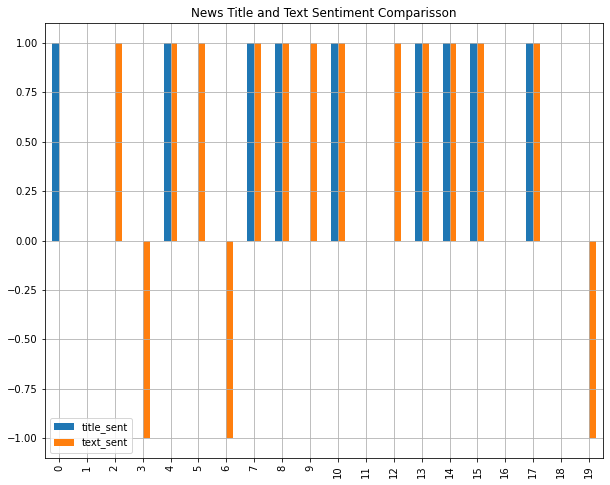

In [9]:
# Plot bar chart
news_en_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

Finally get the descriptive statistics from the English news DataFrame and discuss the analysis results with your partners.

In [8]:
# Describe dataframe
news_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.206310,0.087300,0.912700,0.0,0.450000,0.240360,0.077250,0.901600,0.021100,0.450000
std,0.263213,0.113915,0.113915,0.0,0.510418,0.314722,0.071498,0.081335,0.033692,0.759155
min,0.000000,0.000000,0.690000,0.0,0.000000,-0.318200,0.000000,0.763000,0.000000,-1.000000
25%,0.000000,0.000000,0.821500,0.0,0.000000,0.000000,0.000000,0.862500,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.0,0.000000,0.295700,0.075500,0.920500,0.000000,1.000000
75%,0.381800,0.178500,1.000000,0.0,1.000000,0.445000,0.128750,0.949000,0.055750,1.000000
max,0.735100,0.310000,1.000000,0.0,1.000000,0.890800,0.232000,1.000000,0.085000,1.000000
